# Lab 8 Tasks

Step 1. Download a subset of the 2019 World Happiness Index data from the link below, and load the data into a Pandas Data Frame

http://mlg.ucd.ie/modules/COMP30760/happiness2019.csv

The fields in the data correspond to the following measures:
- *country*: name of the country for each row
- *gdp*: real GDP per capita
- *social_support*: amount of social support that is present in a country
- *health*: healthy life expectancy,
- *freedom*: freedom to make life choices 
- *generosity*: leve of generosity of citizens
- *corruption*: perceptions of corruption in a country

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
url = "http://mlg.ucd.ie/modules/COMP30760/happiness2019.csv"
response = requests.get(url)
with open("happiness.csv", "wb") as f:
            f.write(response.content)
            print("CSV saved!")
            
data = pd.read_csv("happiness.csv")
data

CSV saved!


,country,gdp,social_support,health,freedom,generosity,corruption
0,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
1,Albania,0.947,0.848,0.874,0.383,0.178,0.027
2,Algeria,1.002,1.160,0.785,0.086,0.073,0.114
3,Argentina,1.092,1.432,0.881,0.471,0.066,0.050
4,Armenia,0.850,1.055,0.815,0.283,0.095,0.064
...,...,...,...,...,...,...,...
151,Venezuela,0.960,1.427,0.805,0.154,0.064,0.047
152,Vietnam,0.741,1.346,0.851,0.543,0.147,0.073
153,Yemen,0.287,1.163,0.463,0.143,0.108,0.077
154,Zambia,0.578,1.058,0.426,0.431,0.247,0.087


Step 2. Calculate basic summary statistics for the data. List the top 5 ranked countries for each measure.

In [8]:
print("Range: \n" , ( data.min(), data.max() ) )
print("\n\nMean:\n", data.mean().round(2) )
print("\n\nStandard deviation:\n", data.std().round(2) )

Range: 
 (country           Afghanistan
gdp                         0
social_support              0
health                      0
freedom                     0
generosity                  0
corruption                  0
dtype: object, country           Zimbabwe
gdp                  1.684
social_support       1.624
health               1.141
freedom              0.631
generosity           0.566
corruption           0.453
dtype: object)


Mean:
 gdp               0.91
social_support    1.21
health            0.73
freedom           0.39
generosity        0.18
corruption        0.11
dtype: float64


Standard deviation:
 gdp               0.40
social_support    0.30
health            0.24
freedom           0.14
generosity        0.10
corruption        0.09
dtype: float64


In [44]:
print("--------------------------------------\n\t\tGDP")
ll = data['gdp'].nlargest().index.tolist()
print(data['country'].iloc[ll])
print("--------------------------------------\n\t\tSOCIAL SUPPORT")
ll = data['social_support'].nlargest().index.tolist()
print(data['country'].iloc[ll])
print("--------------------------------------\n\t\tHEALTH")
ll = data['health'].nlargest().index.tolist()
print(data['country'].iloc[ll])
print("--------------------------------------\n\t\tFREEDOM")
ll = data['freedom'].nlargest().index.tolist()
print(data['country'].iloc[ll])
print("--------------------------------------\n\t\tGENEROSITY")
ll = data['generosity'].nlargest().index.tolist()
print(data['country'].iloc[ll])
print("--------------------------------------\n\t\tCORRUPTION")
ll = data['corruption'].nlargest().index.tolist()
print(data['country'].iloc[ll])


#a = df.where(df=='your_value').dropna(how='all').dropna(axis=1)

--------------------------------------
		GDP
114                   Qatar
81               Luxembourg
122               Singapore
146    United Arab Emirates
72                   Kuwait
Name: country, dtype: object
--------------------------------------
		SOCIAL SUPPORT
57         Iceland
43         Finland
105         Norway
36         Denmark
99     New Zealand
Name: country, dtype: object
--------------------------------------
		HEALTH
122      Singapore
55       Hong Kong
67           Japan
129          Spain
133    Switzerland
Name: country, dtype: object
--------------------------------------
		FREEDOM
150              Uzbekistan
21                 Cambodia
105                  Norway
146    United Arab Emirates
43                  Finland
Name: country, dtype: object
--------------------------------------
		GENEROSITY
95      Myanmar
59    Indonesia
53        Haiti
86        Malta
70        Kenya
Name: country, dtype: object
--------------------------------------
		CORRUPTION
122

Step 3. Generate a boxplot of the measures in the dataset.

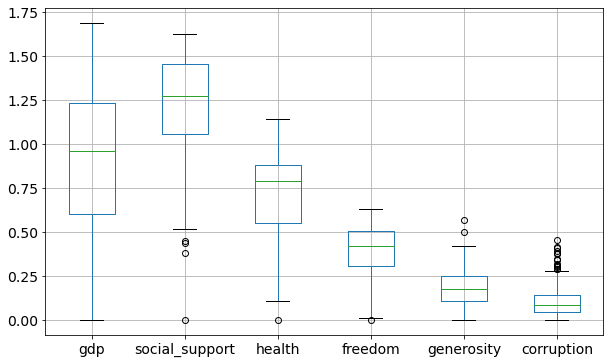

In [47]:
data.boxplot(figsize=(10,6), fontsize=14);

Step 4. Apply a simple linear regression to learn (fit) the model, where *gdp* is the independent variable and *health* is the target variable that we would like to predict. Produce a plot of the regression line.

In [50]:
x = data[["gdp"]].values
y = data[["health"]].values
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [51]:
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_[0])

Model intercept is [0.26564776]
Model slope is [0.50775798]


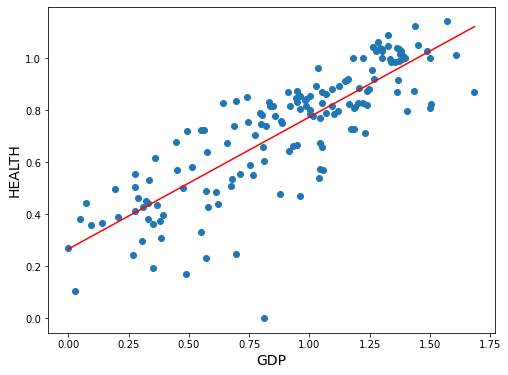

In [53]:
# plot the data
plt.figure(figsize=(8,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('GDP', fontsize=14)
plt.ylabel('HEALTH', fontsize=14);

Step 5. Repeat the process from Step 4, but this time use *generosity* as the target variable. What does a comparison of the two regression lines indicate?

In [54]:
x = data[["gdp"]].values
y = data[["generosity"]].values
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [55]:
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_[0])

Model intercept is [0.20208664]
Model slope is [-0.01904716]


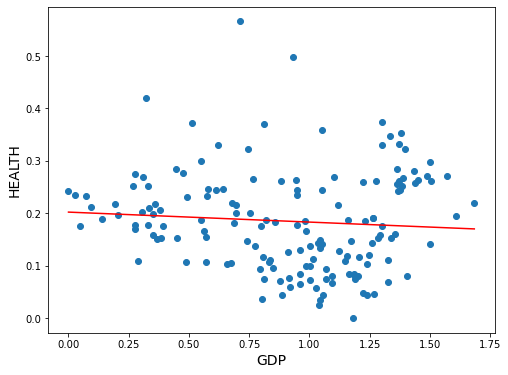

In [56]:
# plot the data
plt.figure(figsize=(8,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('GDP', fontsize=14)
plt.ylabel('HEALTH', fontsize=14);

## THE RESULTS SHOW THAT THERE IS A STRONG CORRELATION BETWEEN GDP AND HEALTH. THE HIGHER THE GDP THE HEALTHIER THE PEOPLE. 

## THAT IS NOT TRUE WHEN IT COMES TO GENEROSITY. THERE IS NO CORRELATION / RELATIONSHIP BETWEEN GDP OF A COUNTRY AND HOW GENEROUS THE CITIZENS ARE.